In [19]:
import pandas as pd
import numpy
import matplotlib as plt
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt	
import seaborn as sns
import folium
import re

# 명사추출
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Okt

# 워드클라우드
from wordcloud import WordCloud

# 카운트함수
from collections import Counter

#폰트path
font_path='C:/Users/admin/Downloads/nanum-all/나눔 글꼴/NanumBarunGothic.ttf'

In [21]:
df_1=pd.read_csv('./부산여행카페_유튜브.csv',encoding='utf-8')

In [22]:
df_1['title'][0:]

0                 부산에서 가장 인기 있는 카페들을 가봤습니다. - [부산 EP.01]
1      부산여행 필수코스 18곳 | 부산시민은 알고 관광객만 모르는💡야경 스팟 & 부산 갈...
2      부산여행 완전정복 !  권역별로 꼭 가봐야하는 부산여행지 23곳 추천, 야경명소, ...
3      부산 [남포동, 중앙동, 영도구] 필수코스 카페&디저트 💥 Busan Travel ...
4      내가 보려고 만든 해운대 모음zip! 해운대 주민이 알려주는 22곳 해운대 맛집 카...
                             ...                        
702                           밀면 하면 여기를 빼놓을 수가 없다는데 맞나요?
703    [ 스테이 vlog ] 리노생카투어 • 카페베네 • 핼로팬 • 코드지• 카페컬렉션 ...
704    먹고 먹고 또 먹어? 부산 ep.2 | 서면 | 스테이 화가 | 캡슐호텔 | 호텔1...
705    [VLOG] 파라다이스호텔 호캉스 브이로그🏖 씨메르/ 해운대호텔/ 해운대/ 서면맛집...
706                  이건희 컬렉션 1부#수집:위대한여정 #부산시립미술관#해운대#부산
Name: title, Length: 707, dtype: object

In [23]:
df_1['title']= df_1['title'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df_1['title']=df_1["title"].map(lambda x : (re.sub(' +', ' ', x)))

In [24]:
df_1

,title
0,부산에서 가장 인기 있는 카페들을 가봤습니다 부산 EP 01
1,부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마...
2,부산여행 완전정복 권역별로 꼭 가봐야하는 부산여행지 23곳 추천 야경명소 부산카페 ...
3,부산 남포동 중앙동 영도구 필수코스 카페 디저트 Busan Travel Ι 부산 카...
4,내가 보려고 만든 해운대 모음zip 해운대 주민이 알려주는 22곳 해운대 맛집 카페...
...,...
702,밀면 하면 여기를 빼놓을 수가 없다는데 맞나요
703,스테이 vlog 리노생카투어 카페베네 핼로팬 코드지 카페컬렉션 비전문 리노야생일축하해
704,먹고 먹고 또 먹어 부산 ep 2 서면 스테이 화가 캡슐호텔 호텔1 광안리 해운대 ...
705,VLOG 파라다이스호텔 호캉스 브이로그 씨메르 해운대호텔 해운대 서면맛집 부산핫플


In [25]:
df_1['title'].to_csv('./부산여행카페_split.csv',encoding='utf-8',index=False)

In [26]:
df_1['title'].str.split(' ',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,부산에서,가장,인기,있는,카페들을,가봤습니다,부산,EP,01,,...,None,None,None,None,None,None,None,None,None,None
1,부산여행,필수코스,18곳,부산시민은,알고,관광객만,모르는,야경,스팟,부산,...,여행지도,공유,,None,None,None,None,None,None,None
2,부산여행,완전정복,권역별로,꼭,가봐야하는,부산여행지,23곳,추천,야경명소,부산카페,...,None,None,None,None,None,None,None,None,None,None
3,부산,남포동,중앙동,영도구,필수코스,카페,디저트,Busan,Travel,Ι,...,None,None,None,None,None,None,None,None,None,None
4,내가,보려고,만든,해운대,모음zip,해운대,주민이,알려주는,22곳,해운대,...,여행,코스,추천,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,밀면,하면,여기를,빼놓을,수가,없다는데,맞나요,,None,None,...,None,None,None,None,None,None,None,None,None,None
703,,스테이,vlog,리노생카투어,카페베네,핼로팬,코드지,카페컬렉션,비전문,리노야생일축하해,...,None,None,None,None,None,None,None,None,None,None
704,먹고,먹고,또,먹어,부산,ep,2,서면,스테이,화가,...,고옥,크로칸슈,,None,None,None,None,None,None,None
705,,VLOG,파라다이스호텔,호캉스,브이로그,씨메르,해운대호텔,해운대,서면맛집,부산핫플,...,None,None,None,None,None,None,None,None,None,None


In [27]:
# 파일로드
data_1 = pd.read_csv('./부산여행카페_split.csv',encoding='utf-8')
data_1 = data_1['title']

In [9]:
data_1

0       부산 맛집 부산 여행 전 보세요 부산 맛집 BEST 12 부산 해운대 맛집 부산 ...
1      부산 맛집 11곳 참지마세요 부산가면 또 x10 갈 맛집 최고의 뷰 카페까지 곁들여...
2      부산여행 필수코스 18곳 부산시민은 알고 관광객만 모르는 야경 스팟 부산 갈 때 마...
3               부산 해운대 필수코스 유명한 식당 Busan Travel Ι 부산 맛집 
4                            현지인만 가는 부산 찐 가성비 식당 BEST 10
                             ...                        
799                         부산 핫플 아더 서면 스페이스 1층에 있는 카페 텅
800    아무계획없이 남자끼리 찾아간 부산여행 그냥찾아가서 즐겨도 재미있는 부산여행 과정을 ...
801    ഗ ന യ ല ക ട ങ ങ യ മലയ ള കള ഉള പ പ ട 26 ന വ കര ...
802             친구와 함께 부산 힐링여행 흰여울문화마을 손목서가 마녀마라집 금련 광안리
803    튀김 좋아하시면 이건 먹고 가세요 줄서는 해운대맛집 타이가텐푸라 Tendong Ha...
Name: title, Length: 804, dtype: object

In [28]:
# 데이터가져오기
f = open("./부산여행카페_split.csv",'rt',encoding='utf-8')
lines = f.readlines() # 한 줄을가져와서 문자열 변환
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

# print(line)

In [29]:
compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):

    a = compile.sub("",line[i])
    line[i] = a
# print(line)

In [30]:
# 문장분석 okt 사용
from konlpy.tag import Okt
okt = Okt()
result =[]
result = [okt.nouns(i) for i in line] #명사만 추출
# final_result= [r for i in result for r in i]
final_result=[r for i in result for r in i if len(r)>1] # 한개는 제거
# print(final_result)

In [31]:
#많이 나온 단어
korean = pd.Series(final_result).value_counts(ascending=False).head(100)
print('키워드')
print(korean)

키워드
카페      784
부산      680
부산여행    412
여행      311
로그      273
       ... 
마지막       9
공유        9
한국        9
애견        9
하루        9
Length: 100, dtype: int64


In [32]:
count_data = korean.to_dict()

In [33]:
count = Counter(count_data)
count

Counter({'카페': 784,
         '부산': 680,
         '부산여행': 412,
         '여행': 311,
         '로그': 273,
         '맛집': 263,
         '브이': 258,
         '광안': 201,
         '해운대': 156,
         '투어': 123,
         '추천': 111,
         '영도': 75,
         '마을': 69,
         '기장': 68,
         '박일': 66,
         '흰여울': 63,
         '거리': 59,
         '문화': 56,
         '코스': 54,
         '일상': 53,
         '소품': 53,
         '오션': 45,
         '커피': 44,
         '서면': 44,
         '호텔': 42,
         '바다': 41,
         '캡슐': 41,
         '해리': 37,
         '전포동': 35,
         '먹방': 35,
         '스카이': 34,
         '요트': 32,
         '감성': 30,
         '혼자': 28,
         '돼지국밥': 26,
         '데이트': 25,
         '숙소': 24,
         '열차': 23,
         '서울': 23,
         '밀면': 21,
         '근교': 21,
         '친구': 21,
         '야경': 21,
         '뚜벅': 20,
         '시장': 20,
         '베이': 20,
         '여름': 18,
         '베이커리': 18,
         '막창': 17,
         '해변': 17,
         '로우': 17,
         

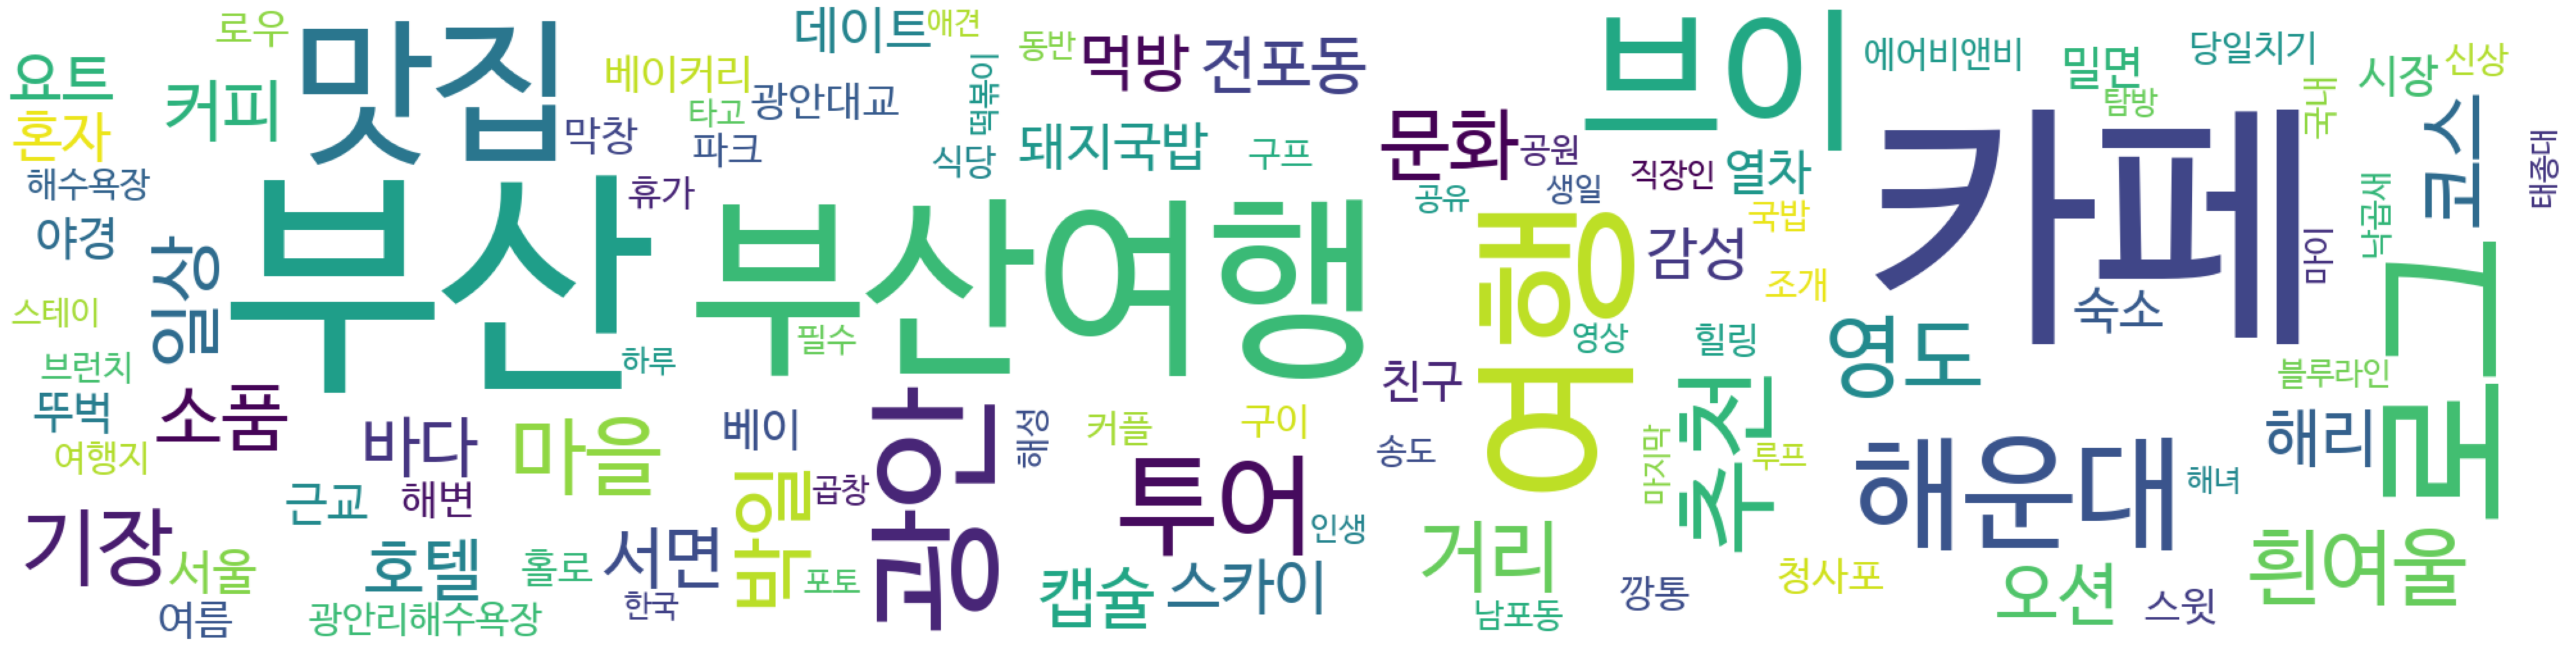

In [34]:
#wordcloud 만들기
wc = WordCloud(max_font_size=200,
	font_path = font_path,
	background_color="white",
    width=2000, height=500).generate_from_frequencies(dict(count))
    # font 경로 개별적으로 설정해야함

plt.figure(figsize = (40,40))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()